     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

 Statistical Analysis:
Kurtosis of Message Length: 17.47
Skewness of Message Length: 2.51


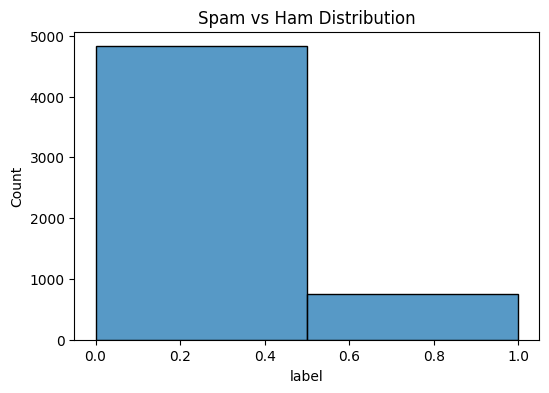

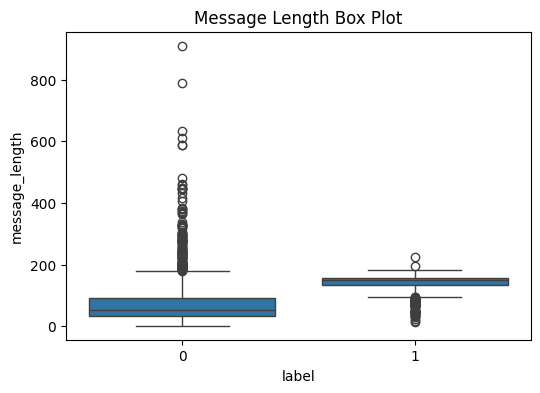

Logistic Regression Accuracy: 0.96
Naïve Bayes Accuracy: 0.98
Random Forest Accuracy: 0.98

📈 Model Performance:
Logistic Regression Accuracy: 0.96
Naïve Bayes Accuracy: 0.98
Random Forest Accuracy: 0.98


<ipython-input-2-ef0926afb080>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


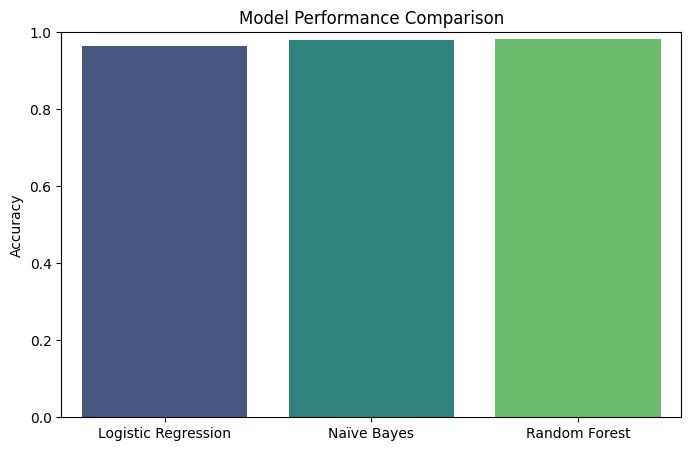

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


df = pd.read_csv("/content/spam.csv", encoding="latin-1")


print(df.head())


df = df.iloc[:, [0, 1]]
df.columns = ["label", "message"]


df["label"] = df["label"].map({"ham": 0, "spam": 1})


df["message_length"] = df["message"].apply(len)

# Compute Kurtosis & Skewness
kurt = kurtosis(df["message_length"])
skewness = skew(df["message_length"])

print("\n Statistical Analysis:")
print(f"Kurtosis of Message Length: {kurt:.2f}")
print(f"Skewness of Message Length: {skewness:.2f}")

plt.figure(figsize=(6, 4))
sns.histplot(df["label"], bins=2)
plt.title("Spam vs Ham Distribution")
plt.show()


df["message_length"] = df["message"].apply(len)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["label"], y=df["message_length"])
plt.title("Message Length Box Plot")
plt.show()

# Removing Outliers (Messages > 400 characters)
df = df[df["message_length"] <= 400]

# Text Preprocessing (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(df["message"])
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_accuracies = {}
# Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")





print("\n📈 Model Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

# ✅ Plot Model Performance Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()
